In [22]:
# Data exploration

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


data = pd.read_csv('data/data_spread_rate_reproduction.csv')

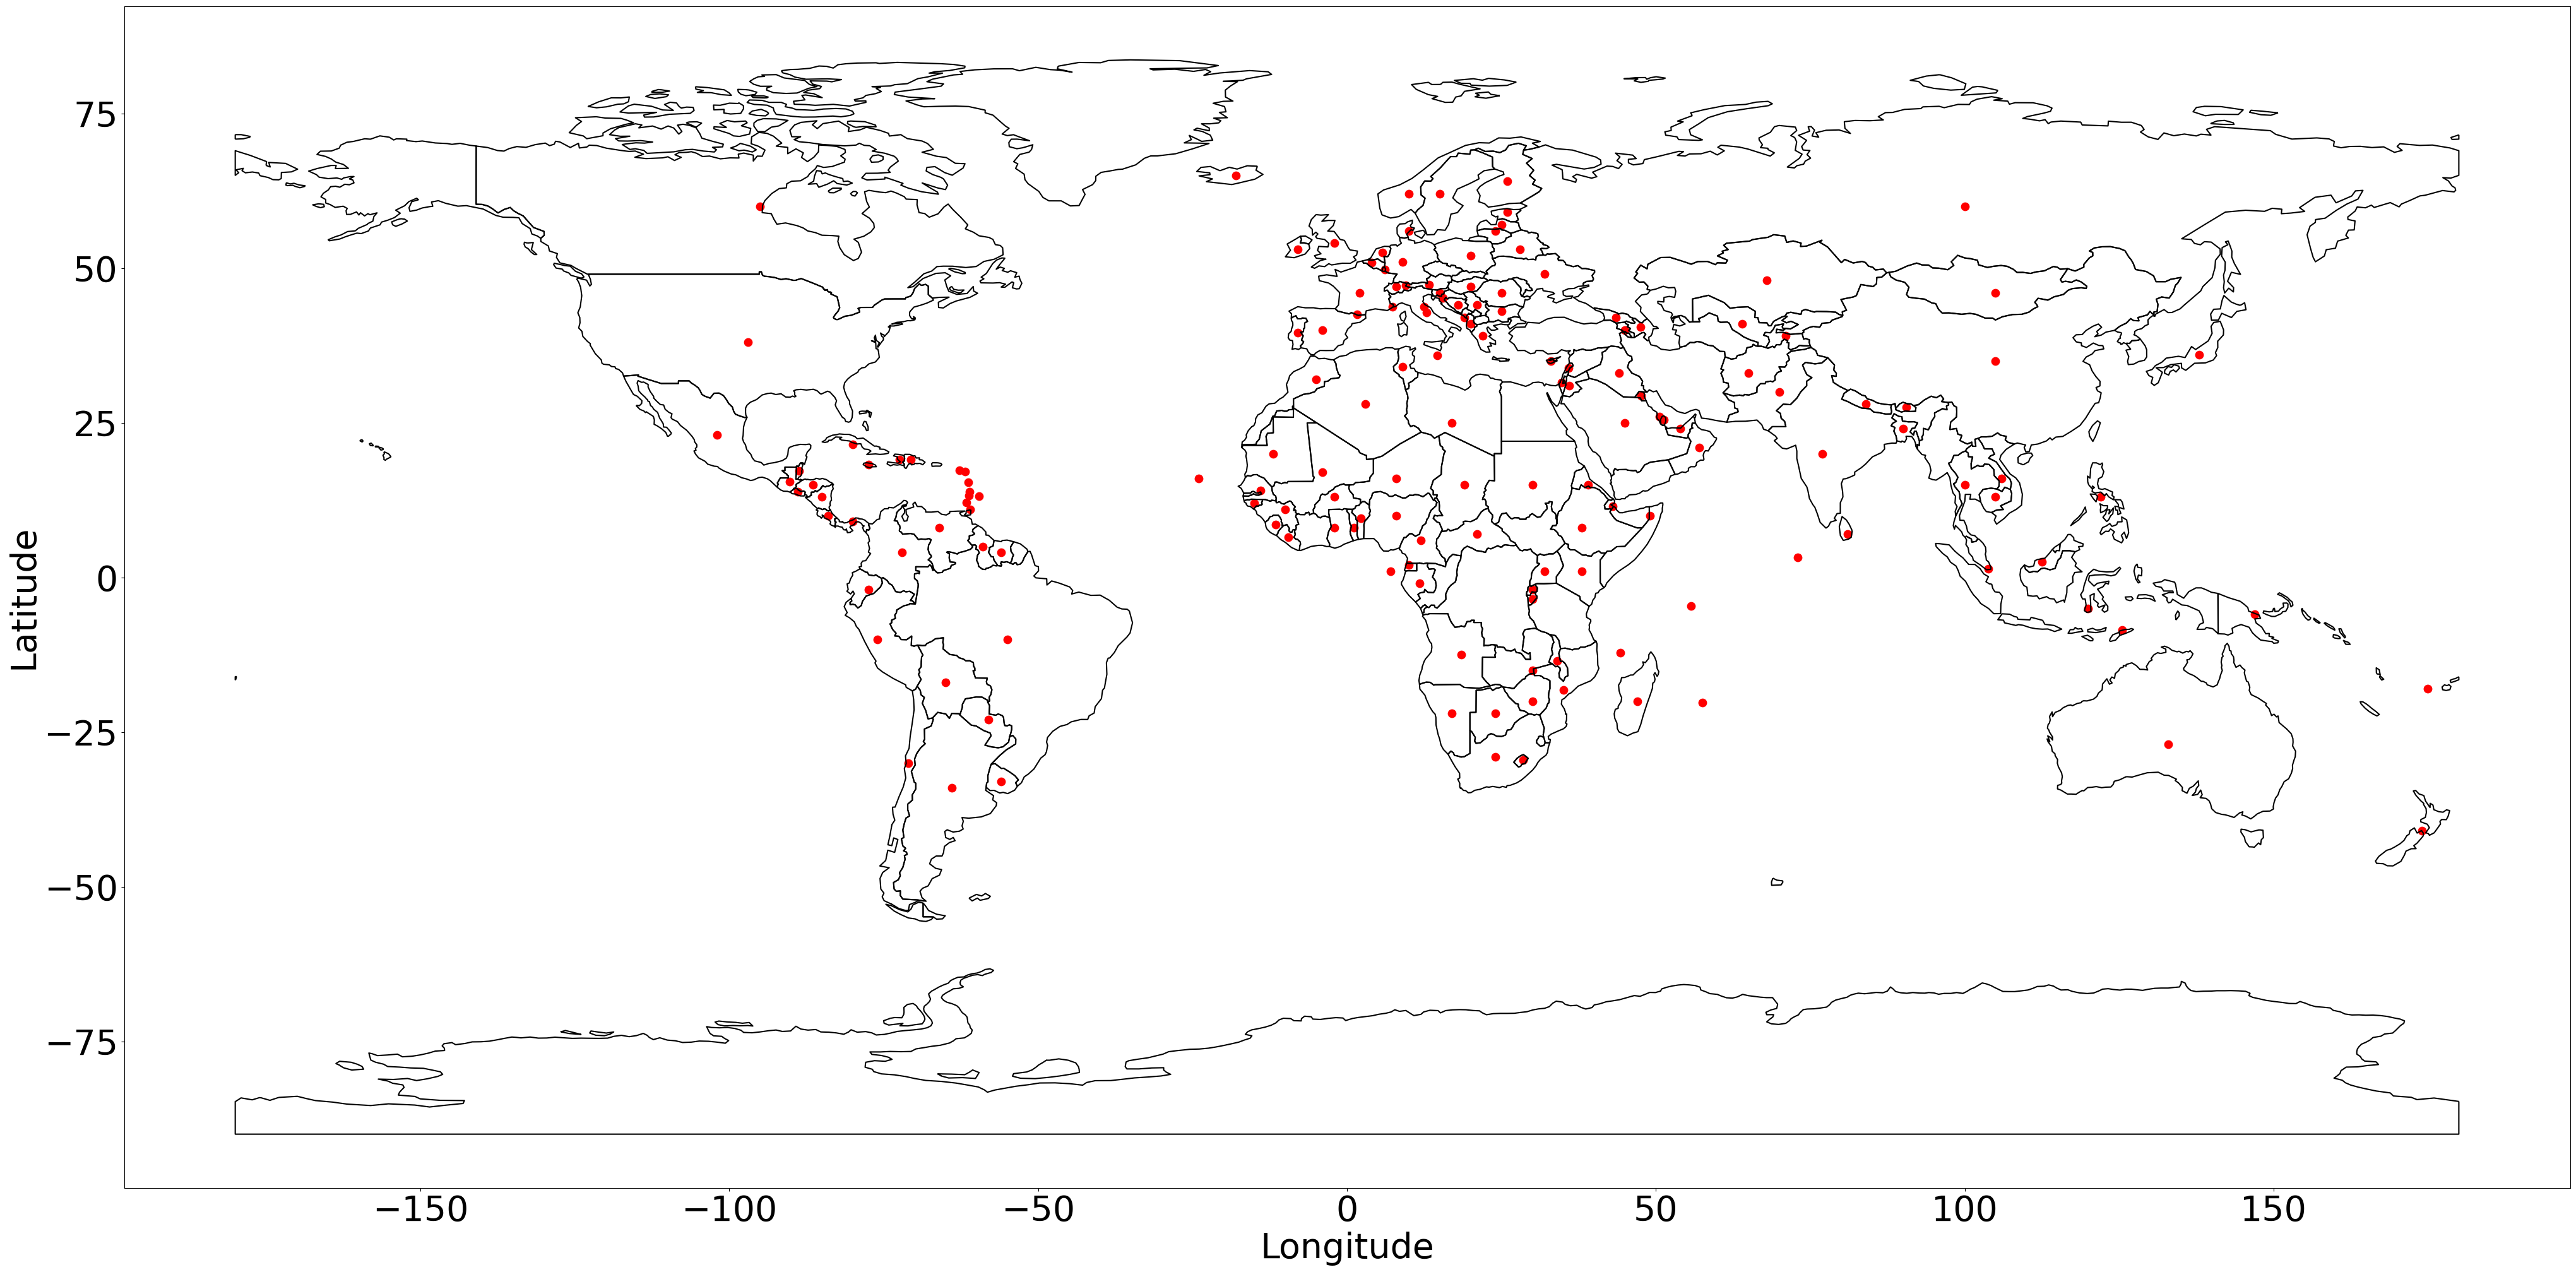

In [29]:
import geopandas as gpd


lat = data['Latitude']
lon = data['Longitude']
contries = data['Country']

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

plt.rcParams.update({'font.size': 40})
fig, ax = plt.subplots(figsize=(50, 50))
world.boundary.plot(ax=ax, edgecolor='black')
ax.scatter(lon, lat, color='red', s=80)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# for i, txt in enumerate(contries):
#     ax.annotate(txt, (lon[i], lat[i]))
    
plt.show()

## Urbanization

We can start by a basic sanity check to ensure that the urbanization rate is between 0 and 100 for all countries.

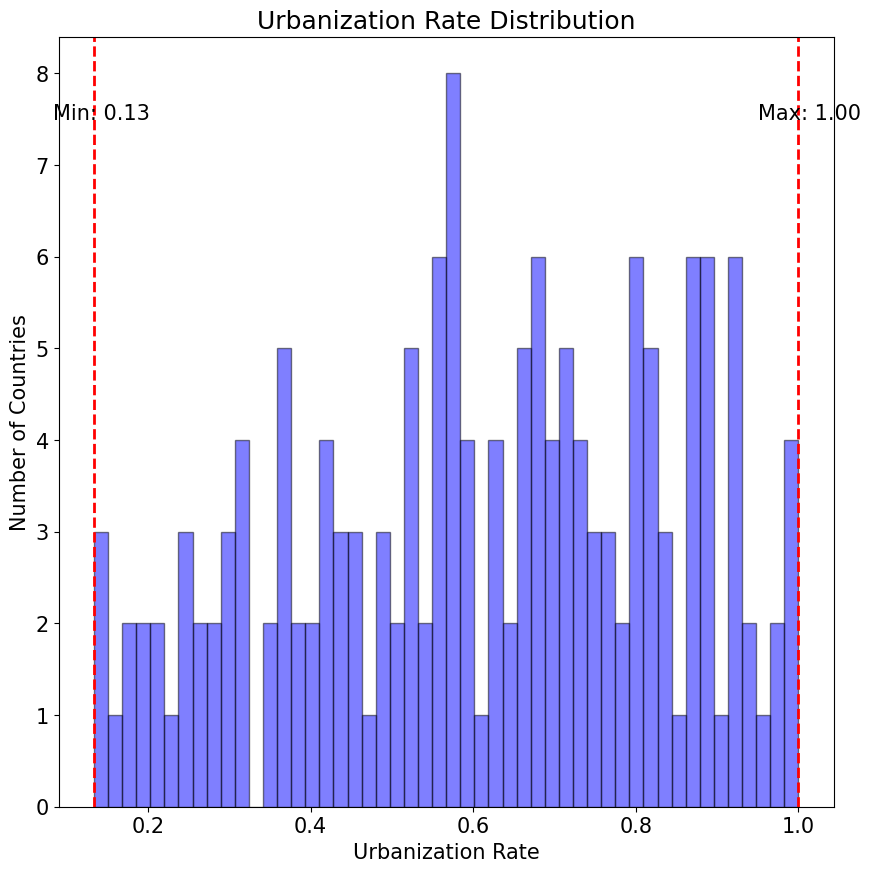

In [25]:
urban = data['Urban Population']
total = data['Total Population']
urban_rate = urban / total

plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(10, 10))
urban_rate.plot.hist(ax=ax, bins=50, alpha=0.5, color='blue', edgecolor='black')
plt.xlabel('Urbanization Rate')
plt.ylabel('Number of Countries')
plt.title('Urbanization Rate Distribution')

min_value = urban_rate.min()
max_value = urban_rate.max()
plt.axvline(min_value, color='red', linestyle='dashed', linewidth=2)
plt.axvline(max_value, color='red', linestyle='dashed', linewidth=2)
plt.text(min_value - 0.05, 7.5, f'Min: {min_value:.2f}')
plt.text(max_value - 0.05, 7.5, f'Max: {max_value:.2f}')
plt.show()

All the values are within the expected range.

In [30]:
countries = data['Country']

full = [i for i,u in enumerate(urban_rate) if u == 1]

print('Countries with urbanization rate of 1:')
print(*countries[full], sep='\n')

Countries with urbanization rate of 1:
Kuwait
Monaco
Singapore


In [33]:
import geopandas as gpd
import difflib

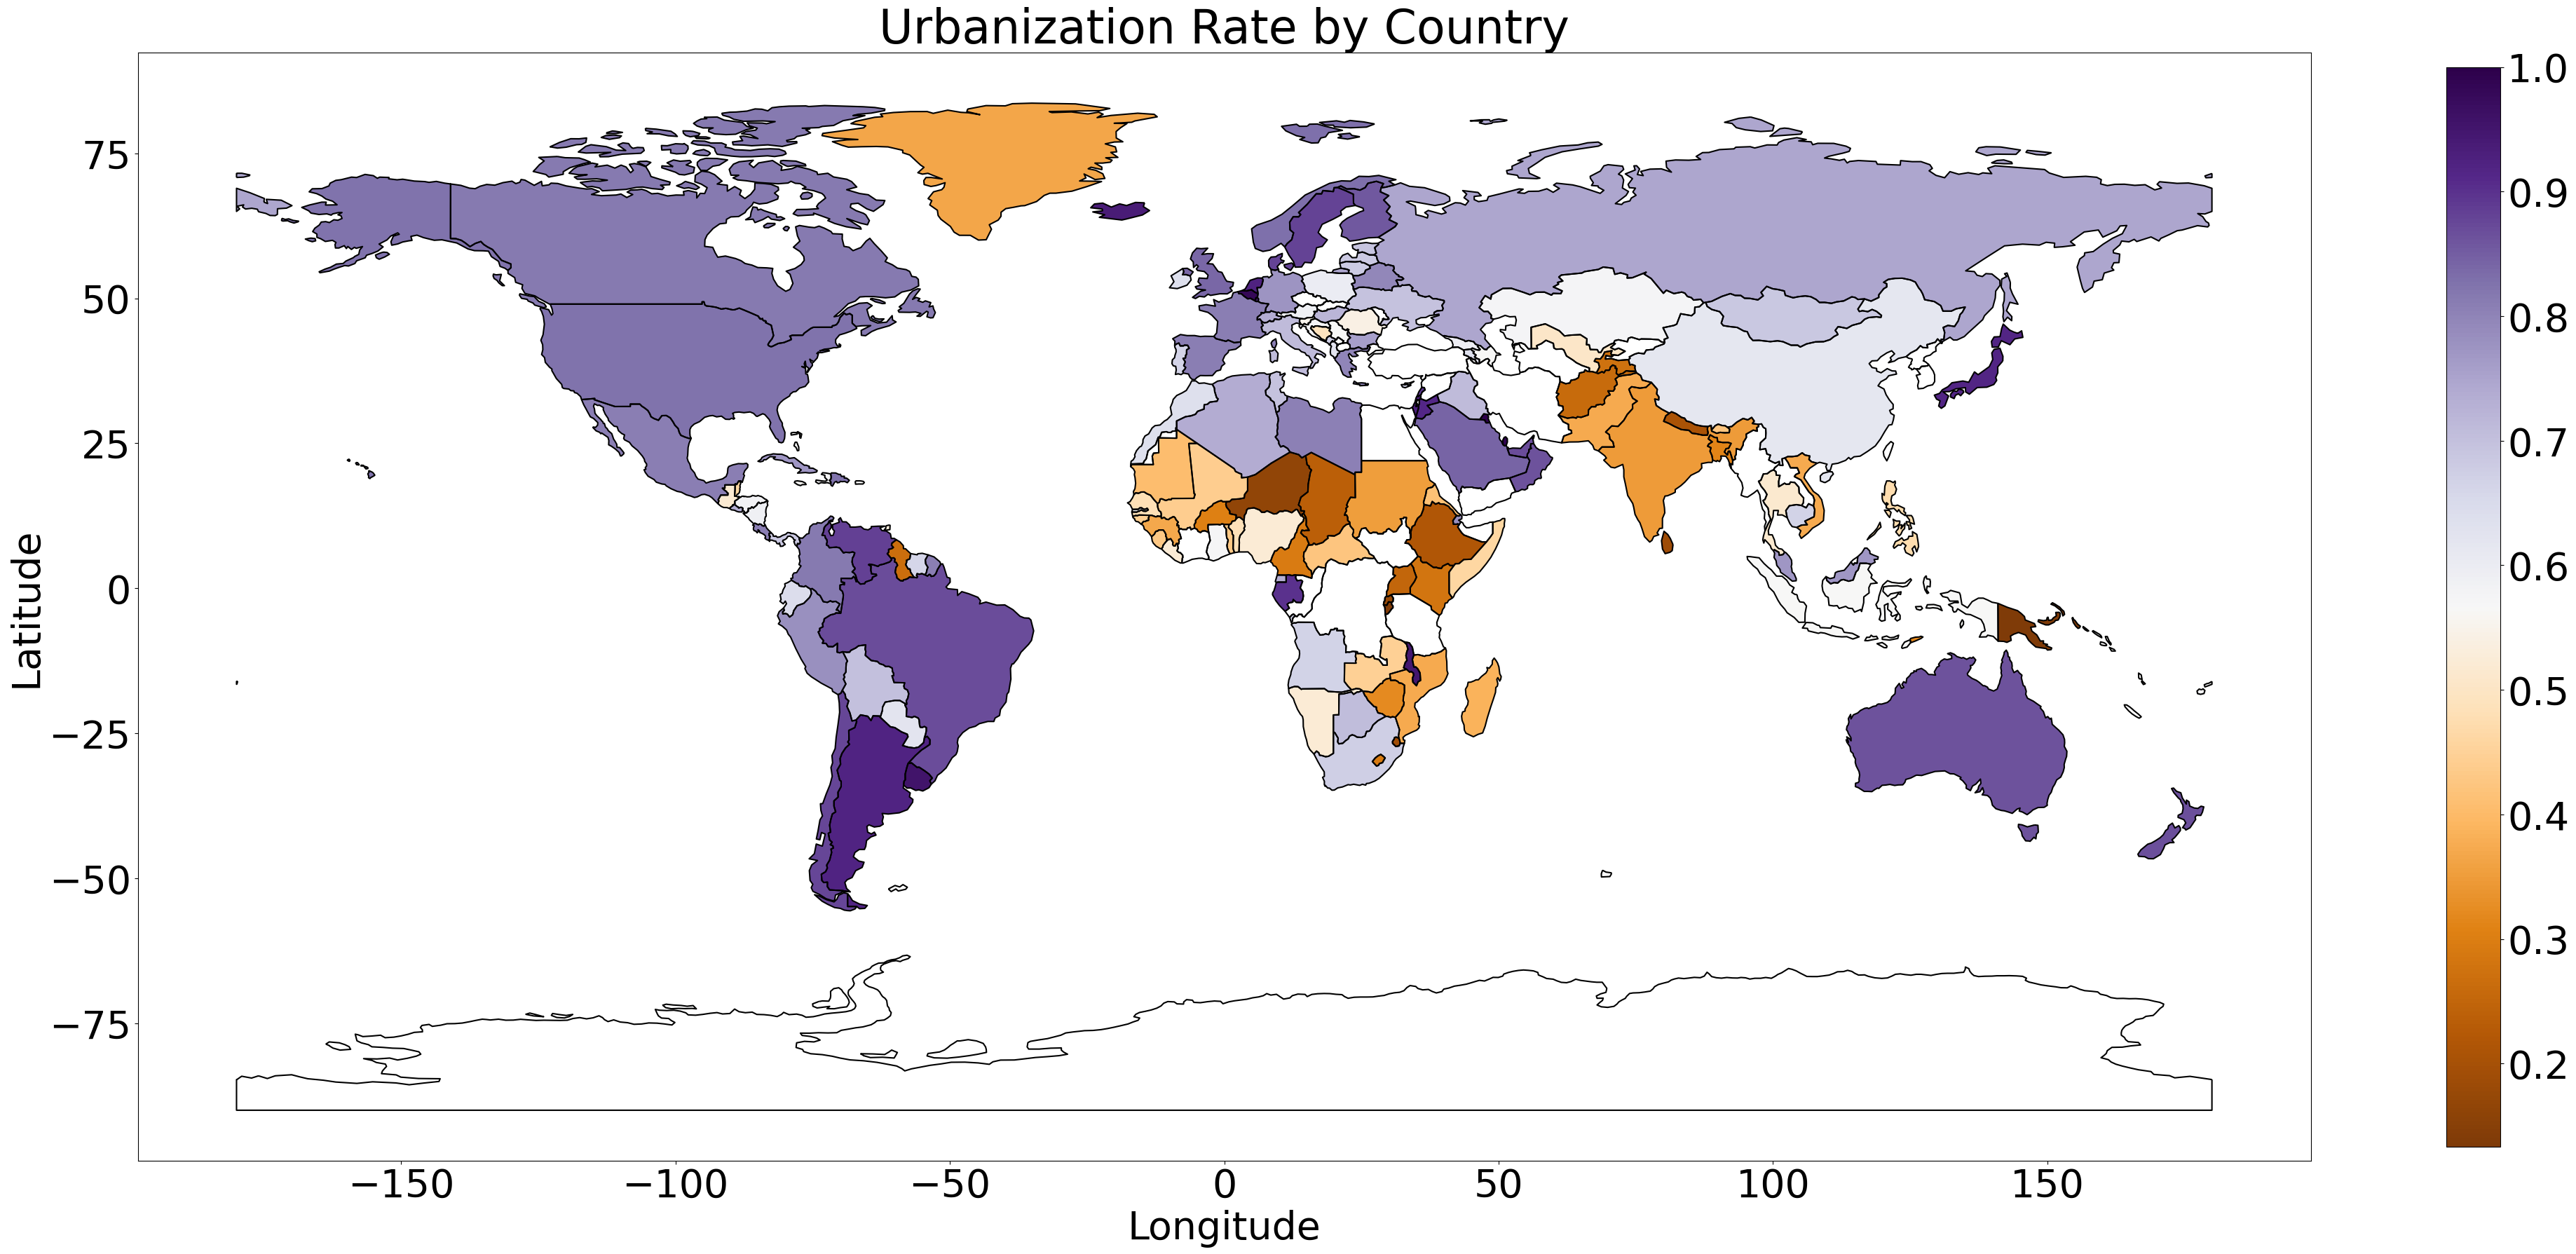

In [34]:
urb = data['Urban Population']/data['Total Population']
countries = data['Country']

# Get countries names for the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
map_names = world['name']

# Find the closest match for each country
matches = [difflib.get_close_matches(c, map_names, n=1, cutoff=0.5) for c in countries]
matches = [m[0] if m else None for m in matches]

# Add the matches to the data
data['Map Name'] = matches
data = data.dropna()

# Plot the world map
plt.rcParams.update({'font.size': 40})
fig, ax = plt.subplots(figsize=(50, 50))
world.boundary.plot(ax=ax, edgecolor='black')

# Fill the countries that are in data with a color based on the urbanization rate
for i, row in data.iterrows():
    name = row['Map Name']
    u = row['Urban Population']/row['Total Population']
    color = plt.cm.PuOr((u - urb.min()) / (urb.max() - urb.min()))
    world[world['name'] == name].plot(ax=ax, color=color)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Urbanization Rate by Country')

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap='PuOr', norm=plt.Normalize(vmin=urb.min(), vmax=urb.max()))
sm._A = []
plt.colorbar(sm, ax=ax, shrink=0.4)

plt.show()

As we could have expected, the urbanization rate is higher in the developed countries and lower in the developing countries.